In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utilities")

from pi_rating import pi_rating

In [2]:
data = pd.read_csv('../data/preprocess_data.csv',sep = ',')

In [3]:
pd.options.display.max_columns = None
data.head(5)

,Tournament,Home Team,Away Team,Match Date,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Team,Opponent Team,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index,Team Result,teamFGA,teamFGM,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamPoss,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamFIC,teamOrtg,opptFGA,opptPoss,teamDrtg,teamEDiff,team_Game_Score,opptFGM,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,oppt_Game_Score,Points difference,Finals,Last 32,Playoffs,Quarter-Finals,Regular Season,Semifinals,Top 16
0,Basket League,KAOD,Aris,2013-10-12,Aris,Away,Regular Season,58-66,0.0,KAOD,Aris,58.0,20.0,43.0,0.46512,1.0,10.0,0.10000,15.0,26.0,0.57692,12.0,22.0,34.0,6.0,6.0,17.0,3.0,3.0,22.0,22.0,40.0,66.0,15.0,33.0,0.45455,9.0,23.0,0.39130,9.0,19.0,0.47368,10.0,18.0,28.0,11.0,8.0,14.0,3.0,3.0,22.0,22.0,57.0,0.0,53.0,21.0,54.838710,28.571429,45.003104,40.566038,40.000000,68.750000,20.874263,69.44,8.640553,4.320276,9.090909,1.094340,36.206897,9.293680,0.352941,0.352941,24.000,83.525346,56.0,68.36,96.547689,-13.022343,26.4,24.0,45.161290,45.833333,51.274083,50.892857,31.250000,60.000000,17.866258,11.702750,4.388531,6.976744,1.178571,37.375,96.547689,83.525346,13.022343,40.000000,15.143172,0.785714,0.571429,39.8,-8.0,0,0,0,0,1,0,0
1,Basket League,PAOK,Kolossos Rhodes,2013-10-12,PAOK,Home,Regular Season,88-81,0.0,PAOK,Kolossos Rhodes,88.0,17.0,35.0,0.48571,10.0,26.0,0.38462,24.0,26.0,0.92308,9.0,22.0,31.0,22.0,7.0,18.0,3.0,1.0,23.0,23.0,96.0,81.0,26.0,42.0,0.61905,5.0,16.0,0.31250,14.0,21.0,0.66667,6.0,25.0,31.0,5.0,8.0,18.0,1.0,3.0,24.0,22.0,69.0,1.0,61.0,27.0,50.000000,81.481481,60.739923,52.459016,26.470588,78.571429,19.902698,81.44,8.595285,3.683694,7.142857,1.442623,38.571429,24.564538,1.222222,0.388889,60.500,108.055010,58.0,79.24,102.221100,5.833909,65.5,31.0,50.000000,16.129032,60.232005,57.758621,21.428571,73.529412,21.116847,10.095911,1.261989,2.857143,1.396552,38.375,102.221100,108.055010,-5.833909,44.285714,6.967670,0.277778,0.444444,46.3,7.0,0,0,0,0,1,0,0
2,Liga ACB,Bilbao,Zaragoza,2013-10-12,Zaragoza,Away,Regular Season,77-86,0.0,Bilbao,Zaragoza,77.0,24.0,46.0,0.52000,5.0,12.0,0.42000,14.0,20.0,0.70000,13.0,19.0,32.0,15.0,7.0,12.0,1.0,1.0,18.0,23.0,89.0,86.0,25.0,39.0,0.64000,10.0,23.0,0.43000,6.0,10.0,0.60000,9.0,20.0,29.0,16.0,10.0,10.0,1.0,1.0,23.0,18.0,95.0,0.0,58.0,29.0,52.459016,51.724138,57.634731,54.310345,39.393939,67.857143,15.228426,65.80,10.638298,1.519757,2.564103,1.327586,50.877193,19.685039,1.250000,0.583333,55.250,117.021277,62.0,67.40,127.596439,-10.575163,59.4,35.0,47.540984,45.714286,64.759036,64.516129,32.142857,60.606061,13.089005,14.836795,1.483680,2.173913,1.387097,65.250,127.596439,117.021277,10.575163,55.555556,19.138756,1.600000,1.000000,70.0,-9.0,0,0,0,0,1,0,0
3,Basket League,Trikala,Kifisia,2013-10-12,Kifisia,Away,Regular Season,64-69,0.0,Trikala,Kifisia,64.0,21.0,41.0,0.51220,

In [4]:
data['Match Date']=pd.to_datetime(data['Match Date'])

In [5]:
data.shape

(5214, 108)

In [6]:
data['Tournament'].unique()

array(['Basket League', 'Liga ACB', 'Eurocup', 'Euroleague'], dtype=object)

# Pi-rating

In [7]:
el_in = np.arange(0.01, 0.25, 0.005)
gamma_in = np.arange(0.01, 0.9, 0.005)

# Greek Basket League

In [31]:
x2=data[(data['Tournament'] =='Basket League')&(data['Match Date'] < '2017-8-1')]

teams1=np.array([x2["Home Team"],x2["Away Team"]]).transpose()

outcomes1=np.array([x2["Team Points"],x2["Opponent Points"]]).transpose()

best,greek_loss_array= pi_rating().optimize_pi_ratings(teams = teams1, outcomes = outcomes1)

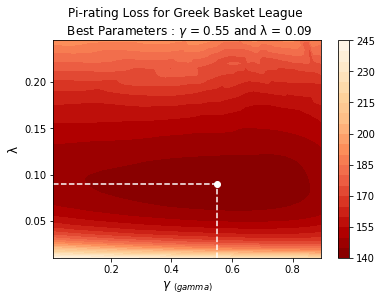

In [32]:
best_lamda,best_gamma = np.where(greek_loss_array == np.min(greek_loss_array))
X, Y = np.meshgrid(gamma_in,el_in)
Z = greek_loss_array
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 20, cmap='OrRd_r')
ax.plot(gamma_in[best_gamma[0]],el_in[best_lamda[0]],'-o',color='white') 
ax.vlines(gamma_in[best_gamma[0]], 0.01, el_in[best_lamda[0]], linestyle="dashed",color='white')
ax.hlines(el_in[best_lamda[0]], 0.01, gamma_in[best_gamma[0]], linestyle="dashed",color='white')

kwargs = {'format': '%.0f'}
fig.colorbar(cp,**kwargs) # Add a colorbar to a plot # Add a colorbar to a plot
title = 'Pi-rating Loss for Greek Basket League \n Best Parameters : $ \gamma$ = ' + str(round(gamma_in[best_gamma[0]],2)) + ' and λ = ' + str(round(el_in[best_lamda[0]],2))
ax.set_title(title)
ax.set_xlabel(r'$ \gamma$ $_{(gamma)} $', fontsize=12)
ax.set_ylabel('λ', fontsize=12)
plt.savefig('Figures/pi_rating_loss_greek.png')
plt.show()

In [33]:
np.min(greek_loss_array)

142.16746162850723

In [34]:
x2=data[(data['Tournament'] =='Basket League')&(data['Match Date'] < '2017-8-1')]

teams1=np.array([x2["Home Team"],x2["Away Team"]]).transpose()

outcomes1=np.array([x2["Team Points"],x2["Opponent Points"]]).transpose()


pi_rating().calculate_pi_ratings(teams = teams1, outcomes = outcomes1, el = 0.1025, gamma = 0.5775, return_e = True)

142.75836680966165

# Liga ACB

In [35]:
x2=data[(data['Tournament'] =='Liga ACB')&(data['Match Date'] < '2017-8-1')]

teams1=np.array([x2["Home Team"],x2["Away Team"]]).transpose()

outcomes1=np.array([x2["Team Points"],x2["Opponent Points"]]).transpose()

best,spain_loss_array= pi_rating().optimize_pi_ratings(teams = teams1, outcomes = outcomes1)

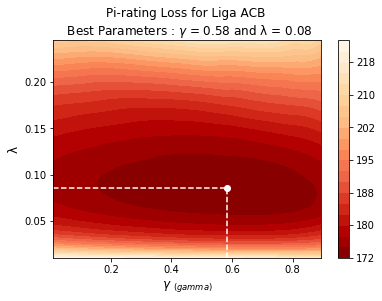

In [36]:
best_lamda,best_gamma = np.where(spain_loss_array == np.min(spain_loss_array))
X, Y = np.meshgrid(gamma_in,el_in)
Z = spain_loss_array
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 20, cmap='OrRd_r')
ax.plot(gamma_in[best_gamma[0]],el_in[best_lamda[0]],'-o',color='white') 
ax.vlines(gamma_in[best_gamma[0]], 0.01, el_in[best_lamda[0]], linestyle="dashed",color='white')
ax.hlines(el_in[best_lamda[0]], 0.01, gamma_in[best_gamma[0]], linestyle="dashed",color='white')

kwargs = {'format': '%.0f'}
fig.colorbar(cp,**kwargs) # Add a colorbar to a plot
title = 'Pi-rating Loss for Liga ACB \n Best Parameters : $ \gamma$ = ' + str(round(gamma_in[best_gamma[0]],2)) + ' and λ = ' + str(round(el_in[best_lamda[0]],2))
ax.set_title(title)
ax.set_xlabel(r'$ \gamma$ $_{(gamma)} $', fontsize=12)
ax.set_ylabel('λ', fontsize=12)
plt.savefig('Figures/pi_rating_loss_spain.png')
plt.show()

In [37]:
np.min(spain_loss_array)

172.63961887378332

In [38]:
x2=data[(data['Tournament'] =='Liga ACB')&(data['Match Date'] < '2017-8-1')]

teams1=np.array([x2["Home Team"],x2["Away Team"]]).transpose()

outcomes1=np.array([x2["Team Points"],x2["Opponent Points"]]).transpose()


pi_rating().calculate_pi_ratings(teams = teams1, outcomes = outcomes1, el = 0.1025, gamma = 0.5775, return_e = True)

173.4612555955668

# Euroleague

In [39]:
x2=data[(data['Tournament'] =='Euroleague')&(data['Match Date'] < '2017-8-1')]

teams1=np.array([x2["Home Team"],x2["Away Team"]]).transpose()

outcomes1=np.array([x2["Team Points"],x2["Opponent Points"]]).transpose()

best,euroleague_loss_array= pi_rating().optimize_pi_ratings(teams = teams1, outcomes = outcomes1)

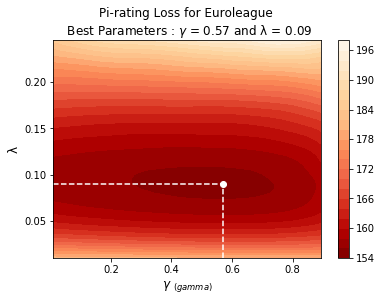

In [40]:
best_lamda,best_gamma = np.where(euroleague_loss_array == np.min(euroleague_loss_array))
X, Y = np.meshgrid(gamma_in,el_in)
Z = euroleague_loss_array
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 20, cmap='OrRd_r')
ax.plot(gamma_in[best_gamma[0]],el_in[best_lamda[0]],'-o',color='white') 
ax.vlines(gamma_in[best_gamma[0]], 0.01, el_in[best_lamda[0]], linestyle="dashed",color='white')
ax.hlines(el_in[best_lamda[0]], 0.01, gamma_in[best_gamma[0]], linestyle="dashed",color='white')

kwargs = {'format': '%.0f'}
fig.colorbar(cp,**kwargs) # Add a colorbar to a plot
title = 'Pi-rating Loss for Euroleague \n Best Parameters : $ \gamma$ = ' + str(round(gamma_in[best_gamma[0]],2)) + ' and λ = ' + str(round(el_in[best_lamda[0]],2))
ax.set_title(title)
ax.set_xlabel(r'$ \gamma$ $_{(gamma)} $', fontsize=12)
ax.set_ylabel('λ', fontsize=12)
plt.savefig('Figures/pi_rating_loss_euroleague.png')
plt.show()

In [41]:
np.min(euroleague_loss_array)

155.51674706436657

In [42]:
x2=data[(data['Tournament'] =='Euroleague')&(data['Match Date'] < '2017-8-1')]

teams1=np.array([x2["Home Team"],x2["Away Team"]]).transpose()

outcomes1=np.array([x2["Team Points"],x2["Opponent Points"]]).transpose()


pi_rating().calculate_pi_ratings(teams = teams1, outcomes = outcomes1, el = 0.1025, gamma = 0.5775, return_e = True)

155.69958715636704

# Eurocup

In [43]:
x2=data[(data['Tournament'] =='Eurocup')&(data['Match Date'] < '2017-8-1')]

teams1=np.array([x2["Home Team"],x2["Away Team"]]).transpose()

outcomes1=np.array([x2["Team Points"],x2["Opponent Points"]]).transpose()

best,eurocup_loss_array= pi_rating().optimize_pi_ratings(teams = teams1, outcomes = outcomes1)

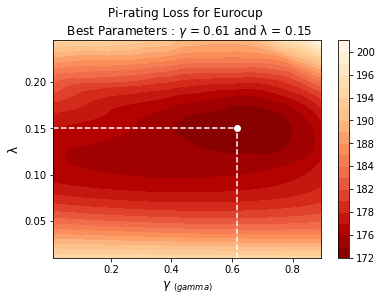

In [44]:
best_lamda,best_gamma = np.where(eurocup_loss_array == np.min(eurocup_loss_array))
X, Y = np.meshgrid(gamma_in,el_in)
Z = eurocup_loss_array
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 20, cmap='OrRd_r')
ax.plot(gamma_in[best_gamma[0]],el_in[best_lamda[0]],'-o',color='white') 
ax.vlines(gamma_in[best_gamma[0]], 0.01, el_in[best_lamda[0]], linestyle="dashed",color='white')
ax.hlines(el_in[best_lamda[0]], 0.01, gamma_in[best_gamma[0]], linestyle="dashed",color='white')

kwargs = {'format': '%.0f'}
fig.colorbar(cp,**kwargs) # Add a colorbar to a plot
title = 'Pi-rating Loss for Eurocup \n Best Parameters : $ \gamma$ = ' + str(round(gamma_in[best_gamma[0]],2)) + ' and λ = ' + str(round(el_in[best_lamda[0]],2))
ax.set_title(title)
ax.set_xlabel(r'$ \gamma$ $_{(gamma)} $', fontsize=12)
ax.set_ylabel('λ', fontsize=12)
plt.savefig('Figures/pi_rating_loss_eurocup.png')
plt.show()

In [45]:
np.min(eurocup_loss_array)

172.8422193516709

In [46]:
x2=data[(data['Tournament'] =='Eurocup')&(data['Match Date'] < '2017-8-1')]

teams1=np.array([x2["Home Team"],x2["Away Team"]]).transpose()

outcomes1=np.array([x2["Team Points"],x2["Opponent Points"]]).transpose()


pi_rating().calculate_pi_ratings(teams = teams1, outcomes = outcomes1, el = 0.1025, gamma = 0.5775, return_e = True)

175.14538784269496